# regularization 
in this notebook we are going to see effect of diffrent way for handelling overfitting
we see model in tree form . 
- without any regularization
- with L2 regularization 
- with dropout method 

we implement all of them with a same set of function 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from reg_utils import * 
from testCases import * 

## cost function

In [2]:
def compute_cost_all_way(AL,Y , param=None,lambd = 0,bias_regular = False):
    """
    implement the cost function with simple way or L2 regularization or dropout method
    accuataly simple way and dropout method have the same cost 

    Arguments:
    AL -- is post-activation or output of forward propagation and it has shape=(number of neuron in last layer , number of training example)
    Y -- is ground true y or label it has shape = (nL,m)
    param -- its a dictionary contain all parameter of network 
    bias_regular -- boolean with set to use bias in regulariztion 

    returns:
    cost -- avrage of loss in whole network 
    """

    if param == None or lambd == 0 :
        return compute_cost(AL,Y)

    m = Y.shape[1]
    cost = compute_cost(AL,Y)
    temp = 0 
    for i in range(1,len(param)//2+1):
        temp += np.sum(np.square(param["W"+str(i)]))
    cost += temp * (lambd/(2*m))
    if bias_regular:
        temp = 0
        for i in range(1,len(param)//2+1):
            temp += np.sum(np.square(param["b"+str(i)]))
        cost += temp* (lambd/(2*m))

    return cost 

In [3]:
A3, Y_assess, parameters = compute_cost_with_regularization_test_case()

print("cost = " + str(compute_cost_all_way(A3, Y_assess, parameters,  0.1 )))

cost = 1.7864859451590758


``` 
cost = 1.7864859451590758
```

## propagation 

In [4]:
def back_propagation_all(X,Y,cache,lambd,bias_regular=False):
    """
    implement back prob in simple and dropout or regularization 

    arguments:
    X -- feature matrix 
    Y -- true labels
    cache -- cahce from forward_propagation 
    bias_regular -- if true we use regularization for bias too 

    returns:
    gradients -- a dictionary of gradiant of parameters 
    """

    if lambd == 0 :
        return backward_propagation(X, Y, cache)

    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T) + (lambd/m)*W3
    
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) + (lambd/m)*W2
    
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T) + (lambd/m)*W1
    
    
    if bias_regular :
        db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True) + (lambd/m)*b3
        db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True) + (lambd/m)*b2
        db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True) + (lambd/m)*b1
    else:
        db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
        db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
        db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients


In [5]:
X_assess, Y_assess, cache = backward_propagation_with_regularization_test_case()

grads = back_propagation_all(X_assess, Y_assess, cache,  0.7)
print ("dW1 = \n"+ str(grads["dW1"]))
print ("dW2 = \n"+ str(grads["dW2"]))
print ("dW3 = \n"+ str(grads["dW3"]))

dW1 = 
[[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2 = 
[[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3 = 
[[-1.77691347 -0.11832879 -0.09397446]]


```
dW1 = 
[[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2 = 
[[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3 = 
[[-1.77691347 -0.11832879 -0.09397446]]
```

In [6]:
def predict(X,param):
    A_ , cache = forward_propagation(X,param)
    A_ = (A_ >= 0.5 ) *1
    return A_

In [7]:
def accuracy(y_hat , y):
    y_pred = (y_hat >= 0.5) * 1
    acc = np.sum(y_pred == y) / y.shape[1]
    return acc 

In [22]:
def forward_propagation_with_dropout(X,parameters,keep_prob):
    np.random.seed(1)
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    np.random.seed(1)
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    d1 = np.random.rand(A1.shape[0],A1.shape[1])<keep_prob
    A1 = np.multiply(A1,d1)
    A1  /= keep_prob
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    d2 = np.random.rand(A2.shape[0],A2.shape[1])<keep_prob
    A2 = np.multiply(A2,d2)
    A2  /= keep_prob
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    #d3 = np.random.randn(A3.shape[0],A3.shape[1])<1
    #A3 = np.multiply(A3,d3)
    #A3  /= keep_prob
    
    cache = (Z1, d1, A1, W1, b1, Z2, d2, A2, W2, b2, Z3, A3, W3, b3)
    return A3, cache

In [9]:
X_assess, parameters = forward_propagation_with_dropout_test_case()

A3, cache = forward_propagation_with_dropout(X_assess, parameters, keep_prob = 0.7)
print ("A3 = " + str(A3))

A3 = [[0.36974721 0.00305176 0.04565099 0.49683389 0.36974721]]


```
A3 = [[0.36974721 0.00305176 0.04565099 0.49683389 0.36974721]]
```

In [10]:
def backward_propagation_with_dropout(X,Y,cache,keep_prob):
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    m = Y.shape[1]
    dZ3 = A3 - Y
    dW3 = (1/m)*np.dot(dZ3,A2.T)
    db3 = (1/m)*np.sum(dZ3,axis=1,keepdims=True)
    dA2 = np.dot(W3.T,dZ3)
    dA2 /= keep_prob
    dA2 = np.multiply(dA2,D2)
    dZ2 = np.multiply(dA2,np.int64(A2>0))
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dA1 = np.dot(W2.T,dZ2)
    dA1 /= keep_prob
    dA1 = np.multiply(dA1,D1)
    dZ1 = np.multiply(dA1,np.int64(A1>0))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)

    grads = {
        "dW3":dW3 , "db3":db3 , "dW2" :dW2 ,"db2":db2 , "dW1" : dW1 , "db1":db1,"dA1":dA1,"dA2":dA2,
        "dZ3":dZ3 , "dZ2":dZ2 , "dZ1" : dZ1
    }
    return grads

In [11]:
X_assess, Y_assess, cache = backward_propagation_with_dropout_test_case()

gradients = backward_propagation_with_dropout(X_assess, Y_assess, cache, keep_prob = 0.8)

print ("dA1 = \n" + str(gradients["dA1"]))
print ("dA2 = \n" + str(gradients["dA2"]))

dA1 = 
[[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 = 
[[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]


```
dA1 = 
[[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 = 
[[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]
```

## importing data 

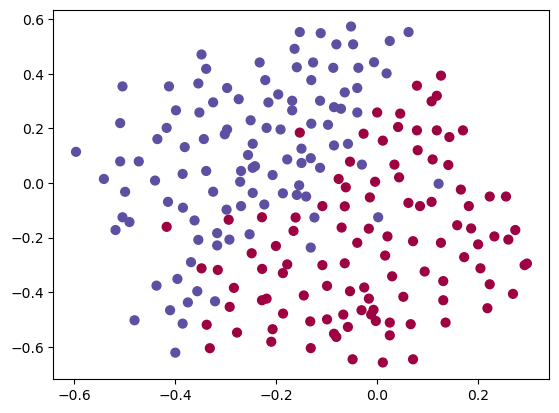

In [12]:
X_train , y_train , X_test , y_test = load_2D_dataset()

## modelling 

In [31]:
def model(lambd=0,keep_prob=1 ,epochs = 30000 , alpha = 0.3 ,bias_regular=False , X = X_train , y = y_train , X_t = X_test , y_t = y_test ,verbose = True ):
    np.random.seed(1)
    param = initialize_parameters((X.shape[0], 20, 3, 1))#[X.shape[0], 20, 3, 1]
    costs = []
    accuracies = []
    accuracies_test = []
    for i in range(epochs):
        if keep_prob == 1 :
            AL , cache = forward_propagation(X , param)
            AL_t , cache_t = forward_propagation(X_t , param)
            cost = compute_cost_all_way(AL,y,lambd=lambd,bias_regular=bias_regular)
            costs.append(cost)
            grad = back_propagation_all(X,y,cache,lambd,bias_regular)
        else:
            AL , cache = forward_propagation_with_dropout(X,param,keep_prob)
            AL_t , cache_t = forward_propagation(X_t,param)
            cost = compute_cost_all_way(AL,y,lambd=0,bias_regular=False)
            costs.append(cost)
            grad = backward_propagation_with_dropout(X,y,cache,keep_prob)
        param = update_parameters(param,grad,alpha)
        acc = accuracy(AL , y)
        accuracies.append(acc)
        acc_test = accuracy(AL_t,y_t)
        accuracies_test.append(acc_test)
        if i %1000 == 0 :
            print(f"iteration:{i}\ncost:{cost}\naccuracy:{acc}\ntest accuracy:{acc_test}\n*******************************")
    
    plt.Figure(figsize=(26,4))
    plt.subplot(1,3,1)
    plt.plot(costs)
    plt.title("cost")
    plt.subplot(1,3,2)
    plt.plot(accuracies)
    plt.title("accuracy")
    plt.subplot(1,3,3)
    plt.plot(accuracies_test)
    plt.title("test accuracy")
    return param


## 1 _ simple model without regularization 

iteration:0
cost:0.6557412523481002
accuracy:0.6729857819905213
test accuracy:0.69
*******************************


iteration:1000
cost:0.2222669386845115
accuracy:0.9289099526066351
test accuracy:0.935
*******************************
iteration:2000
cost:0.20288702607598844
accuracy:0.9383886255924171
test accuracy:0.935
*******************************
iteration:3000
cost:0.18251497924686955
accuracy:0.9383886255924171
test accuracy:0.945
*******************************
iteration:4000
cost:0.1805397830621775
accuracy:0.9289099526066351
test accuracy:0.94
*******************************
iteration:5000
cost:0.17620471758400458
accuracy:0.9289099526066351
test accuracy:0.93
*******************************
iteration:6000
cost:0.16832730392115416
accuracy:0.9383886255924171
test accuracy:0.935
*******************************
iteration:7000
cost:0.16583593654672973
accuracy:0.933649289099526
test accuracy:0.94
*******************************
iteration:8000
cost:0.163126719144605
accuracy:0.933649289099526
test accuracy:0.93
*******************************
iteration:9000
cost:0.15942612253245106
accuracy:0

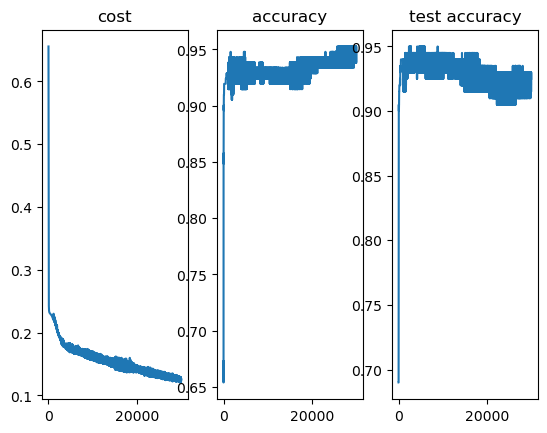

In [14]:
param_simple = model()

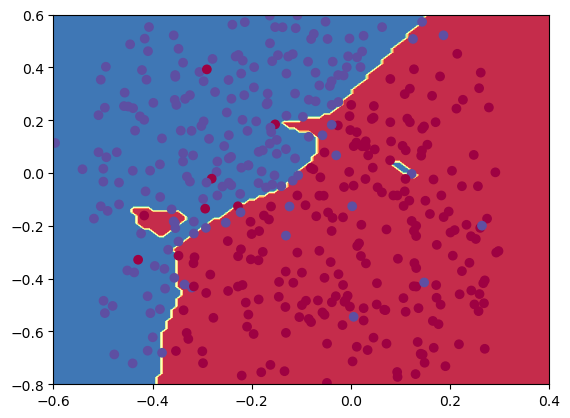

In [15]:
X_grid , Y_grid = np.meshgrid(np.linspace(-0.6,0.4,100),np.linspace(-0.8,0.6,100))
input_grid = np.vstack((X_grid.ravel(),Y_grid.ravel()))
Z_grid = predict(input_grid,param_simple)
plt.contourf(X_grid,Y_grid,Z_grid.reshape(X_grid.shape),cmap=plt.cm.Spectral)
plt.scatter(X_train[0,:] , X_train[1,:],c=y_train,cmap=plt.cm.Spectral)
plt.scatter(X_test[0,:] , X_test[1,:],c=y_test,cmap=plt.cm.Spectral)



## 2 _ l2 regularization 

iteration:0
cost:0.6557412523481002
accuracy:0.6729857819905213
test accuracy:0.69
*******************************
iteration:1000
cost:0.2317053515434879
accuracy:0.9241706161137441
test accuracy:0.935
*******************************
iteration:2000
cost:0.23131613222629233
accuracy:0.9289099526066351
test accuracy:0.935
*******************************
iteration:3000
cost:0.23090686674365973
accuracy:0.9289099526066351
test accuracy:0.93
*******************************
iteration:4000
cost:0.2300402546884912
accuracy:0.9289099526066351
test accuracy:0.93
*******************************
iteration:5000
cost:0.22899537874244716
accuracy:0.9289099526066351
test accuracy:0.93
*******************************
iteration:6000
cost:0.22801453304617708
accuracy:0.9289099526066351
test accuracy:0.93
*******************************
iteration:7000
cost:0.22711895448645283
accuracy:0.9289099526066351
test accuracy:0.93
*******************************
iteration:8000
cost:0.22630966373340053
accuracy:0.9

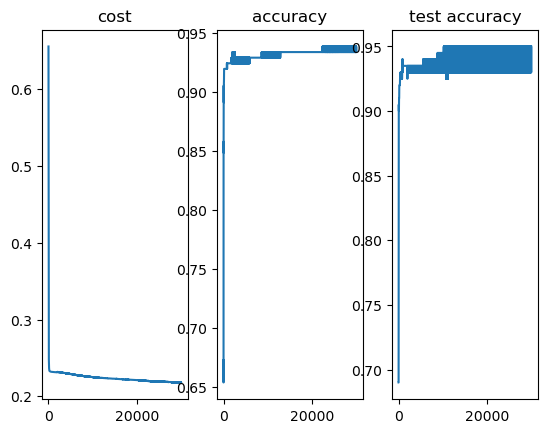

In [16]:
parameters_l2 = model(lambd = 0.7 )

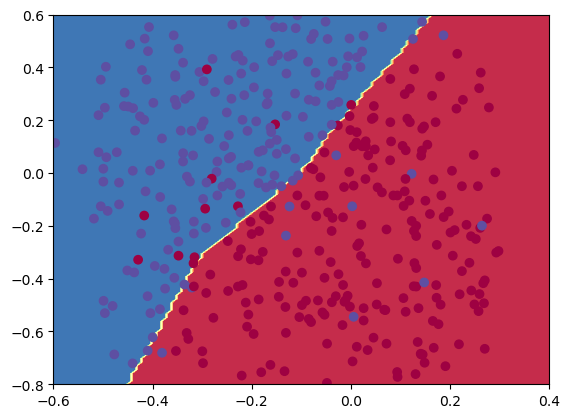

In [17]:
Z_grid = predict(input_grid,parameters_l2)
plt.contourf(X_grid,Y_grid,Z_grid.reshape(X_grid.shape),cmap=plt.cm.Spectral)
plt.scatter(X_train[0,:] , X_train[1,:],c=y_train,cmap=plt.cm.Spectral)
plt.scatter(X_test[0,:] , X_test[1,:],c=y_test,cmap=plt.cm.Spectral)

## 3 _ regular with bias 

iteration:0
cost:0.6557412523481002
accuracy:0.6729857819905213
test accuracy:0.69
*******************************
iteration:1000
cost:0.23217116952079847
accuracy:0.9241706161137441
test accuracy:0.94
*******************************
iteration:2000
cost:0.23152682350822942
accuracy:0.9241706161137441
test accuracy:0.935
*******************************
iteration:3000
cost:0.2308502697921572
accuracy:0.9241706161137441
test accuracy:0.935
*******************************
iteration:4000
cost:0.22991461747014674
accuracy:0.9241706161137441
test accuracy:0.935
*******************************
iteration:5000
cost:0.22887394707928405
accuracy:0.9289099526066351
test accuracy:0.935
*******************************
iteration:6000
cost:0.22774320983998095
accuracy:0.9289099526066351
test accuracy:0.935
*******************************
iteration:7000
cost:0.2266404963344894
accuracy:0.9289099526066351
test accuracy:0.935
*******************************
iteration:8000
cost:0.2255978100877865
accuracy:

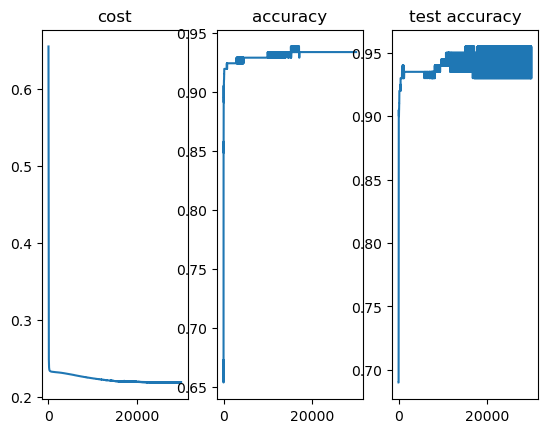

In [18]:
parameters_l2_b = model(lambd = 0.7 ,bias_regular=True)

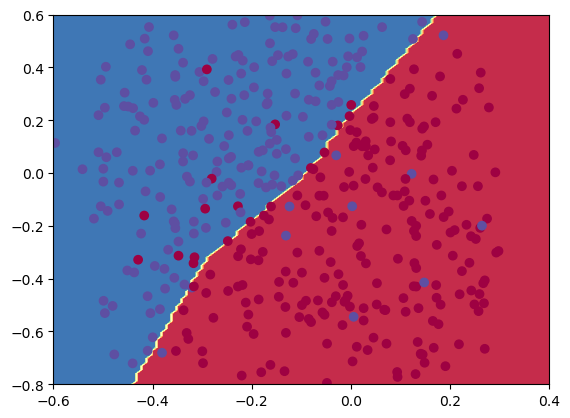

In [19]:
Z_grid = predict(input_grid,parameters_l2_b)
plt.contourf(X_grid,Y_grid,Z_grid.reshape(X_grid.shape),cmap=plt.cm.Spectral)
plt.scatter(X_train[0,:] , X_train[1,:],c=y_train,cmap=plt.cm.Spectral)
plt.scatter(X_test[0,:] , X_test[1,:],c=y_test,cmap=plt.cm.Spectral)

## 4 _ dropout regularization 

iteration:0
cost:0.6765787145990387
accuracy:0.4834123222748815
test accuracy:0.69
*******************************
iteration:1000
cost:0.2684409376168466
accuracy:0.8578199052132701
test accuracy:0.94
*******************************
iteration:2000
cost:0.2610985166569419
accuracy:0.8578199052132701
test accuracy:0.935
*******************************
iteration:3000
cost:0.260226273429976
accuracy:0.8578199052132701
test accuracy:0.935
*******************************
iteration:4000
cost:0.26027465304098263
accuracy:0.8578199052132701
test accuracy:0.94
*******************************
iteration:5000
cost:0.25979415006235596
accuracy:0.8578199052132701
test accuracy:0.935
*******************************
iteration:6000
cost:0.2597183928933785
accuracy:0.8578199052132701
test accuracy:0.935
*******************************
iteration:7000
cost:0.2596600620429233
accuracy:0.8578199052132701
test accuracy:0.935
*******************************
iteration:8000
cost:0.2596282740981182
accuracy:0.857

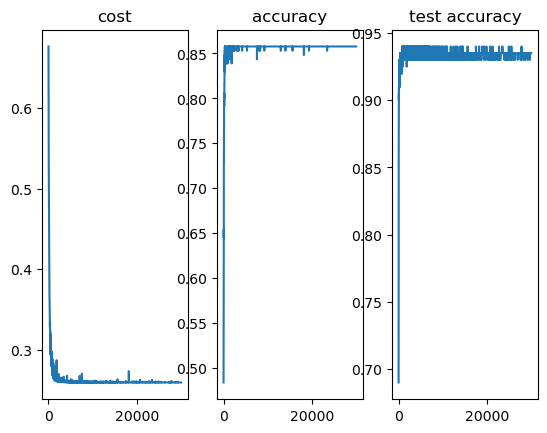

In [34]:
parameters_dropout_model = model(keep_prob=0.5)#0.86

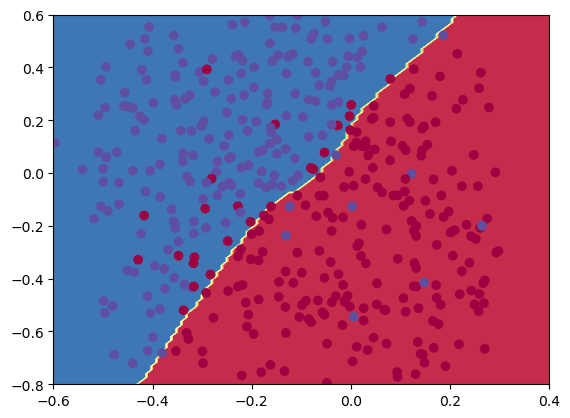

In [35]:
Z_grid = predict(input_grid,parameters_dropout_model)
plt.contourf(X_grid,Y_grid,Z_grid.reshape(X_grid.shape),cmap=plt.cm.Spectral)
plt.scatter(X_train[0,:] , X_train[1,:],c=y_train,cmap=plt.cm.Spectral)
plt.scatter(X_test[0,:] , X_test[1,:],c=y_test,cmap=plt.cm.Spectral)

iteration:0
cost:0.6543912405149825
accuracy:0.6350710900473934
test accuracy:0.69
*******************************
iteration:1000
cost:0.1759784892976791
accuracy:0.9478672985781991
test accuracy:0.93
*******************************
iteration:2000
cost:0.10396707442900775
accuracy:0.966824644549763
test accuracy:0.945
*******************************
iteration:3000
cost:0.07661297787357771
accuracy:0.976303317535545
test accuracy:0.945
*******************************


c:\Users\ARMA\Desktop\github\Improving-Deep-Neural-Networks\reguralization\reg_utils.py:236: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
c:\Users\ARMA\Desktop\github\Improving-Deep-Neural-Networks\reguralization\reg_utils.py:236: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


iteration:4000
cost:0.06719891269813577
accuracy:0.976303317535545
test accuracy:0.95
*******************************
iteration:5000
cost:0.06466905008519826
accuracy:0.976303317535545
test accuracy:0.95
*******************************
iteration:6000
cost:0.06240987259698132
accuracy:0.976303317535545
test accuracy:0.95
*******************************
iteration:7000
cost:0.06187873531315629
accuracy:0.976303317535545
test accuracy:0.95
*******************************
iteration:8000
cost:0.0614332181524981
accuracy:0.976303317535545
test accuracy:0.95
*******************************
iteration:9000
cost:0.061192143757634855
accuracy:0.976303317535545
test accuracy:0.95
*******************************
iteration:10000
cost:0.0610169865749056
accuracy:0.976303317535545
test accuracy:0.95
*******************************
iteration:11000
cost:0.06093245082616846
accuracy:0.976303317535545
test accuracy:0.95
*******************************
iteration:12000
cost:0.06082640196596112
accuracy:0.976

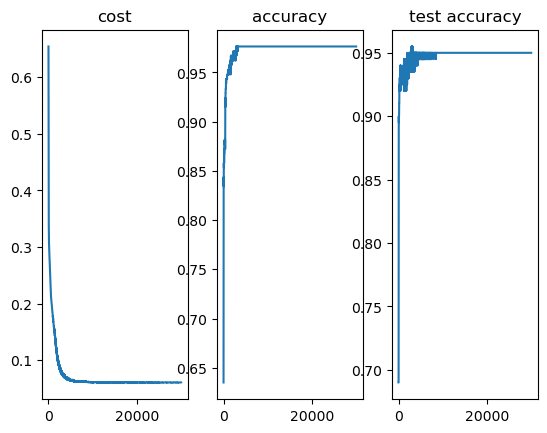

In [32]:
parameters_dropout_model_86 = model(keep_prob=0.86)#0.5

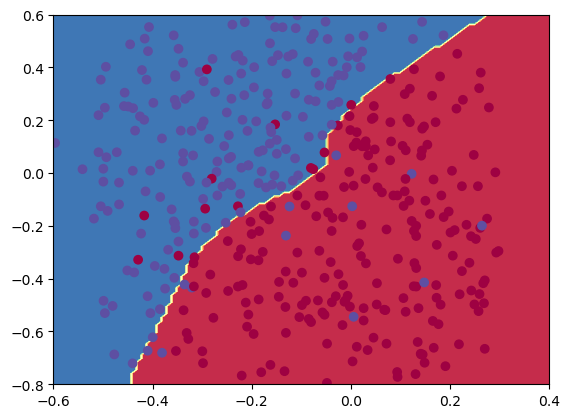

In [33]:
Z_grid = predict(input_grid,parameters_dropout_model_86)
plt.contourf(X_grid,Y_grid,Z_grid.reshape(X_grid.shape),cmap=plt.cm.Spectral)
plt.scatter(X_train[0,:] , X_train[1,:],c=y_train,cmap=plt.cm.Spectral)
plt.scatter(X_test[0,:] , X_test[1,:],c=y_test,cmap=plt.cm.Spectral)

- note that you should use dropout implementation on training only 
- dont use it when you are testing or using it in action 
- this procedure is only for training 